### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

In this case the independent variable is the congruence and the time taken to recongnize the word is the dependent variable. This is because time is dependent on whether the words are congruent or incongruent

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline


df = pd.read_csv("stroopdata.csv")
df.head()

con_mean = df['Congruent'].mean()
print("Congruent Mean",con_mean)

incon_mean = df['Incongruent'].mean()
print("Incongruent Mean",incon_mean)

congruent = df['Congruent']
incongruent = df['Incongruent']

con_std = statistics.stdev(congruent)
print("Sample Congruent Standard Deviation",con_std)

incon_std = statistics.stdev(incongruent)
print("Sample Incongruent Standerd Deviation",incon_std)

print("Congruent Variance",statistics.variance(congruent))
print("Incongruent Variance",statistics.variance(incongruent))

print(df.describe())
dif_mean = (con_mean-incon_mean)
print(dif_mean)

Congruent Mean 14.051125
Incongruent Mean 22.0159166667
Sample Congruent Standard Deviation 3.5593579576451955
Sample Incongruent Standerd Deviation 4.7970571224691385
Congruent Variance 12.6690290707
Incongruent Variance 23.0117570362
       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
-7.96479166667


I calculated each mean, standard deviation and variance seperatly as well as used the built in describe function to show the descriptive statistics for the dataset. I also calculated the difference in congruent and incongruent means. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

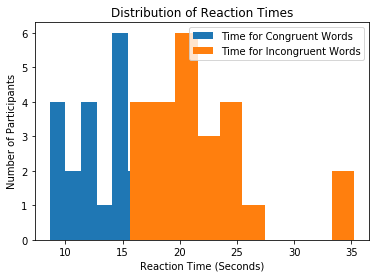

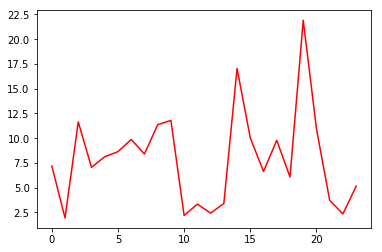

In [11]:
plt.hist(df['Congruent'], label='Time for Congruent Words')
plt.hist(df['Incongruent'], label='Time for Incongruent Words')
plt.xlabel('Reaction Time (Seconds)')
plt.ylabel('Number of Participants')
plt.title('Distribution of Reaction Times')
plt.legend(loc='upper right')
plt.show()


difference = df['Incongruent']-df['Congruent']

plt.plot(difference, color='red')


The first visualization I created was of a histogram showing the reaction time for both congruent and incongruent words in the same chart and visually you can see the number of participants for both incongruent and congruent words and what their respective reaction times were. I can observe that the time taken for incongruent words is generally higher than for congruent words. The next chart I created was a line chart showing the differences in reaction times for incongruent and congruent. We can learn from this chart that each participant had a difference in their reaction time and the time taken for incongruent words could take between 2 and 20 seconds longer than for congruent words. 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [26]:
import scipy.stats as st

## first i will assign each criteria to a variable
n = len(df)
deg_freedom = n-1
alpha = 0.05
tails = 2

## Calculate t-critical value
t_crit = st.t.ppf(alpha/tails, deg_freedom)
print("T Critical Value",t_crit)

## Calculate mean difference between test conditions
difference = df['Incongruent'] - df['Congruent']
mean_diff = difference.mean()

## Sampling Error
sd = difference.std(ddof=1)
se = s_d/np.sqrt(n)

## Calculate t-score
tscore = mean_diff/se
print(f"T-score Incongruent vs Congruent: {tscore}")



T Critical Value -2.06865761042
T-score Incongruent vs Congruent: 8.020706944109957


Observation - T-score falls outside t-region therefore Reject Null Hypothesis


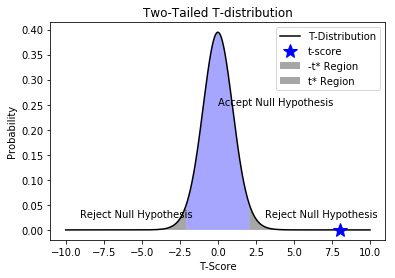

In [31]:
## Visualize t distribution
plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, st.t.pdf(xs,deg_freedom), 'k', label="T-Distribution")


plt.fill_between(x=np.linspace(-abs(t_crit), abs(t_crit)), 
                 y1=st.t.pdf(np.linspace(-abs(t_crit), abs(t_crit)),deg_freedom),
                 facecolor='blue',
                 alpha=0.35)

# Critical regions
plt.fill_between(x=np.linspace(-10,-abs(t_crit)), 
                 y1=st.t.pdf(np.linspace(-10,-abs(t_crit)),deg_freedom),
                 facecolor='black',
                 alpha=0.35, label="-t* Region")

plt.fill_between(x=np.linspace(abs(t_crit), 10), 
                 y1= st.t.pdf(np.linspace(abs(t_crit),10),deg_freedom),
                 facecolor='black',
                 alpha=0.35,label="t* Region")

# t score
plt.plot(tscore, p, 'b*',ms=15, label="t-score")

plt.text(x=0, y=0.25, s="Accept Null Hypothesis")
plt.text(x=-abs(t_crit)-7, y=0.025, s= "Reject Null Hypothesis") 
plt.text(x=abs(t_crit)+1, y=0.025, s= "Reject Null Hypothesis") 

# labels
plt.xlabel("T-Score"); plt.ylabel("Probability"); plt.title("Two-Tailed T-distribution"); plt.legend()
print("Observation - T-score falls outside t-region therefore Reject Null Hypothesis")

Based on our calculations for the t-score and and the visualization of where our t-score falls on the t-distribution chart we can confidently reject the null hypothesis. The T-score we calculated is higher than the T-Critical value, therefore we can state that the time taken to name the color is longer for incongruent words as opposed to congruent words.